In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
BASE_PATH = "/content/drive/MyDrive/datasetpqc"  # Adjust this to your dataset location in Google Drive
MODEL_PATH = "/content/classifier.h5"
PLOT_PATH = "/content/training_plot.png"

# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
INIT_LR = 1e-4

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create generators
train_generator = datagen.flow_from_directory(
    BASE_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    BASE_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Build the model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(len(train_generator.class_indices), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Calculate steps
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

# Ensure at least one step for each
steps_per_epoch = max(1, steps_per_epoch)
validation_steps = max(1, validation_steps)

# Train the model
print("[INFO] training the network...")
H = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS
)

# Save the model
print("[INFO] saving the model...")
model.save(MODEL_PATH, save_format="h5")

# Plot the training results
plt.style.use("ggplot")
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(H.history["val_loss"])), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, len(H.history["accuracy"])), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(H.history["val_accuracy"])), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(PLOT_PATH)
plt.show()

# Print class indices
print("Class indices:", train_generator.class_indices)

Found 225 images belonging to 22 classes.
Found 45 images belonging to 22 classes.
[INFO] training the network...
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.0510 - loss: 3.2776 - val_accuracy: 0.0312 - val_loss: 3.1178
Epoch 2/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.0625 - loss: 3.2179

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.0625 - loss: 3.2179 - val_accuracy: 0.0000e+00 - val_loss: 3.0751
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.0260 - loss: 3.2693

AttributeError: 'NoneType' object has no attribute 'items'

[PosixPath('/content/drive/MyDrive/datasetpqc/steelobrite_scrubpad'), PosixPath('/content/drive/MyDrive/datasetpqc/PVR_4700_Popcorn'), PosixPath('/content/drive/MyDrive/datasetpqc/medimix_soap_625gm'), PosixPath('/content/drive/MyDrive/datasetpqc/Shri Rajbhog 250g x 2 PREIMIUM Lotus Seeds Pop :Gorgon Nut Puffed Kernel (Makhana) 500 gm Phool Makhana  (500 g, Pack of 2)'), PosixPath('/content/drive/MyDrive/datasetpqc/pepsi_2.25ml'), PosixPath('/content/drive/MyDrive/datasetpqc/knorrsoup'), PosixPath('/content/drive/MyDrive/datasetpqc/milkybikis'), PosixPath('/content/drive/MyDrive/datasetpqc/tropicana_180ml_mixedfruits'), PosixPath('/content/drive/MyDrive/datasetpqc/pears_soap'), PosixPath('/content/drive/MyDrive/datasetpqc/tropicana_125ml_mixedfruits'), PosixPath('/content/drive/MyDrive/datasetpqc/Aachi Sambar Powder  (100 g)'), PosixPath('/content/drive/MyDrive/datasetpqc/nevia_cream_300ml'), PosixPath('/content/drive/MyDrive/datasetpqc/chings_vegnoodles'), PosixPath('/content/drive/My

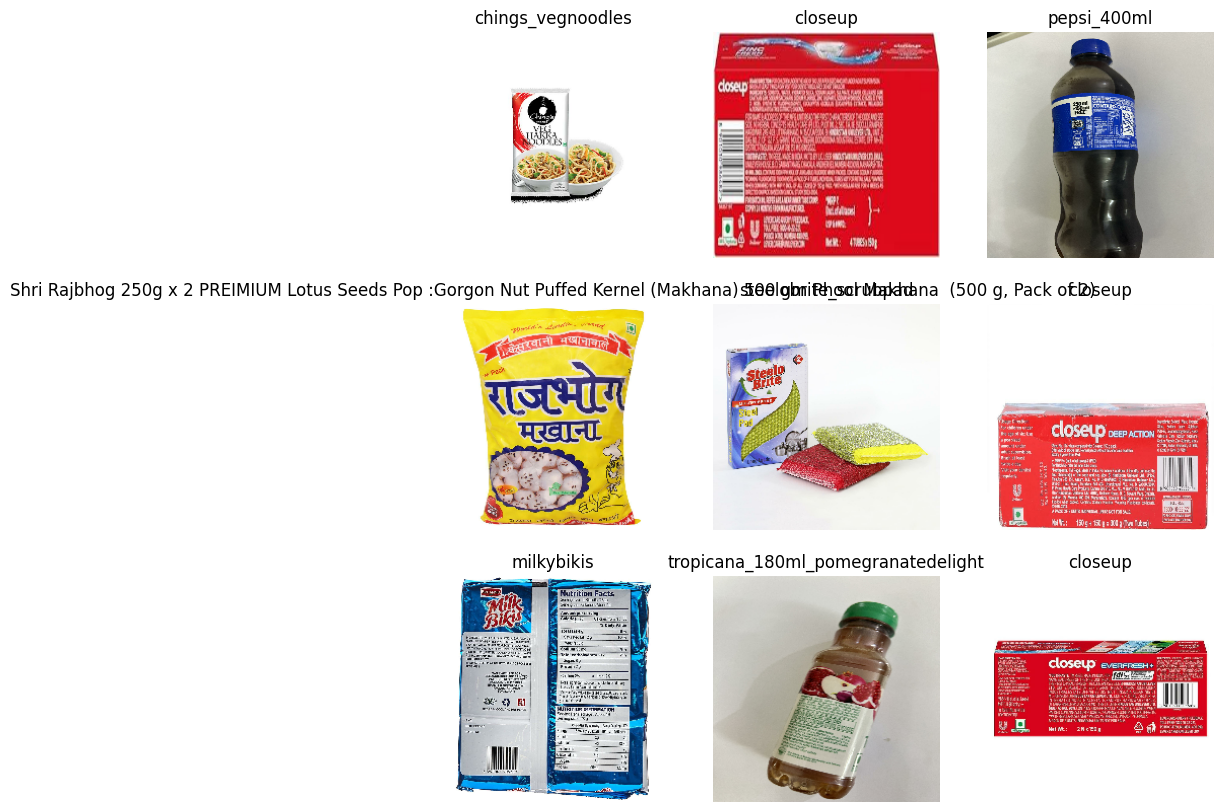

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.0405 - f1_m: 0.0000e+00 - loss: 3.3423 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.1852 - val_f1_m: 0.0000e+00 - val_loss: 2.9255 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1050 - f1_m: 0.0000e+00 - loss: 3.0249 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_accuracy: 0.2778 - val_f1_m: 0.0000e+00 - val_loss: 2.8057 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1739 - f1_m: 0.0177 - loss: 2.7713 - precision_m: 0.1030 - recall_m: 0.0097 - val_accuracy: 0.2222 - val_f1_m: 0.0303 - val_loss: 2.6874 - val_precision_m: 0.5000 - val_recall_m: 0.0156
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2200 - f1_m: 0.0848 - loss: 2.5046 - precision_m: 0.5005 - recall_m: 0.0472 - val_accuracy: 0.3519 - val_f1_m: 0.0811 - val_loss: 2.5159 - val_preci

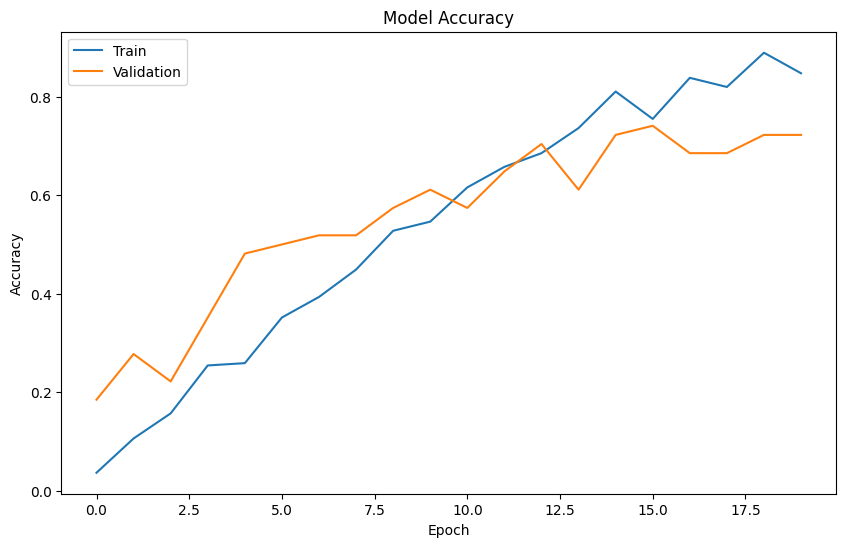

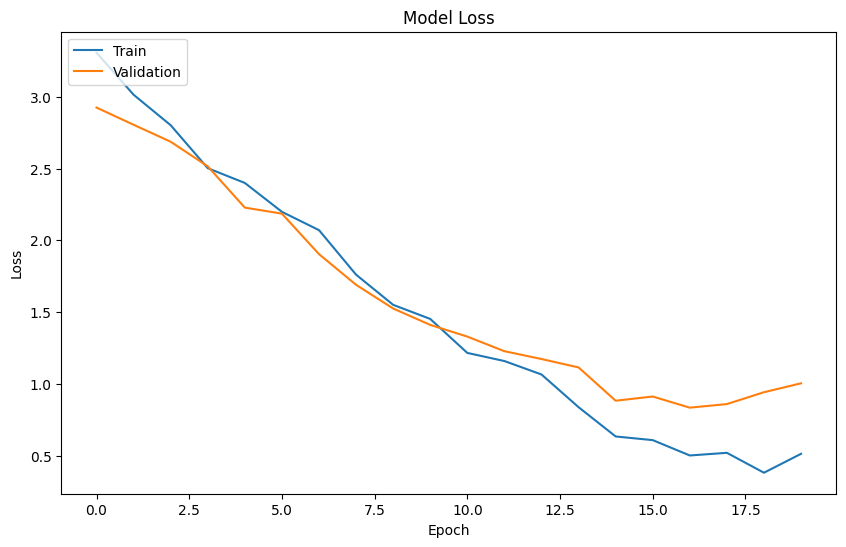

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/product_classification_model.

In [ ]:


# Install necessary packages
!pip install pillow-heif
!pip install tensorflow_addons

# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib
import matplotlib.pyplot as plt
import PIL
from pillow_heif import register_heif_opener
import cv2
import os

# Register HEIF opener to handle HEIC images
register_heif_opener()

# Set the path to your dataset in Google Drive
data_dir = pathlib.Path('/content/drive/MyDrive/datasetpqc')

# Function to convert HEIC to JPEG
def convert_heic_to_jpeg(heic_path, jpeg_path):
    heif_file = PIL.Image.open(heic_path)
    heif_file.save(jpeg_path, "JPEG")

# Convert HEIC images to JPEG
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith('.heic'):
            heic_path = os.path.join(root, file)
            jpeg_path = os.path.join(root, file[:-5] + '.jpg')
            convert_heic_to_jpeg(heic_path, jpeg_path)

# List the contents of the data directory
print(list(data_dir.iterdir()))

# Display a sample image
sample_category = list(data_dir.iterdir())[0]
sample_image = list(sample_category.glob('*.jpg'))[0]  # Look for JPG files
print(sample_image)
PIL.Image.open(str(sample_image)).show()

# Set up image parameters
img_height, img_width = 224, 224
batch_size = 32

# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
print("Classes:", class_names)

# Display sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Build the model
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, 3),
    pooling='avg',
    classes=len(class_names),
    weights='imagenet'
)
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(len(class_names), activation='softmax'))

# Define metrics
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    y_true_pos = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=K.shape(y_pred)[1]))
    y_pred_pos = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true_pos * y_pred_pos, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true_pos, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true_pos = K.flatten(K.one_hot(K.cast(y_true, 'int32'), num_classes=K.shape(y_pred)[1]))
    y_pred_pos = K.flatten(y_pred)
    true_positives = K.sum(K.round(K.clip(y_true_pos * y_pred_pos, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred_pos, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', f1_m, precision_m, recall_m]
)

# Train the model
epochs = 20
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the model
resnet_model.save('/content/drive/MyDrive/product_classification_model.keras')

# Test the model on a single image
test_image_path = '/content/drive/MyDrive/test_image.jpg'  # Replace with your test image path
image = cv2.imread(test_image_path)
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)

pred = resnet_model.predict(image)
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)

# Download the model (optional)
from google.colab import files
files.download('/content/drive/MyDrive/product_classification_model')

In [ ]:
resnet_model.save('/content/drive/MyDrive/product_classification_model.keras')

In [ ]:
test_image_path = '/content/drive/MyDrive/test_image.jpg'  # Replace with your test image path
image = cv2.imread(test_image_path)
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)

pred = resnet_model.predict(image)
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The predicted class is surfexel_bar
